ML-
 1.supervised :
        1.regression :
            1.linear regression :
                in linear regression only 1 independent column and 1 dependent column present.
                line equation is Y=MX+C
            2.multiple linear regression :
                in multiple linear regression multiple independent variables and 1 dependent variable is present .
                line equation is Y=MnXn+C
        2.classification :
            1.logistic regression : 
                in logistic regression line is not helpful so it will create sigmoidal curve like (S) .in logistic                         regression output always is 0 or 1 , or yes or No .
                expression for sigmoidal curve is :
                    p=1/(1+e^-y)
                after evaluating this expression and put value of Y in line equation . expression is 
                   Ln(p/(1-p))=MX+C
2.unsupervised

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Data Preprocessing
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train.drop(['PassengerId','Name','Ticket','Fare'] , axis=1 ,inplace=True)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S


In [8]:
train.isnull()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,True,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,True,False


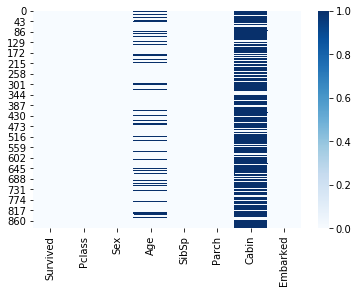

In [9]:
#Exploratory Analysis
sns.heatmap(train.isnull(),cmap='Blues')

In [10]:
#we will remove the column as more than 700 fields have null value
train.drop(['Cabin'],axis=1,inplace=True)

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [12]:
train['Age'].mode()

0    24.0
dtype: float64

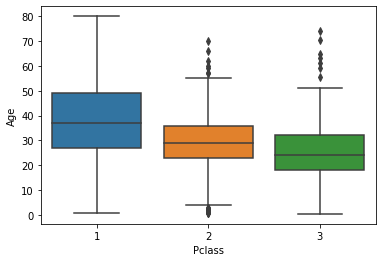

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else :
            return 24
    else:
        return age

In [15]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [17]:
train.dropna(axis=0,inplace=True)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 55.6+ KB


In [19]:
#Binary Encoding
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [20]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
# One hot encoding
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
train.drop(['Sex','Embarked'],axis=1,inplace=True)

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22.0,1,0
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,0


In [24]:
train['Sex']=sex

In [25]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Sex
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [26]:
train=pd.concat([train,embarked],axis=1)

In [27]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Sex,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [28]:
train.drop(['Sex'],axis=1,inplace=True)

In [29]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Q,S
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,0,0
2,1,3,26.0,0,0,0,1
3,1,1,35.0,1,0,0,1
4,0,3,35.0,0,0,0,1


In [30]:
train=pd.concat([train,sex],axis=1)

In [31]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Q,S,male
0,0,3,22.0,1,0,0,1,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,1,0
3,1,1,35.0,1,0,0,1,0
4,0,3,35.0,0,0,0,1,1


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Q           889 non-null uint8
S           889 non-null uint8
male        889 non-null uint8
dtypes: float64(1), int64(4), uint8(3)
memory usage: 44.3 KB


In [33]:
X=train.drop('Survived',axis=1)

In [34]:
Y=train['Survived']

In [35]:
type(Y)

pandas.core.series.Series

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [1]:
from sklearn.linear_model import LogisticRegression

In [2]:
lr=LogisticRegression()

In [40]:
lr.fit(x_train,y_train)

C:\Users\Bhushan Bagul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred=lr.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[146  19]
 [ 37  65]]


In [43]:
(154+64)/(154+17+32+64)

0.8164794007490637

In [44]:
#checking for random data
check_for = np.array([[2,84,0,0,1,1,0],[1,44,0,0,1,0,0]])

In [45]:
new_pred=lr.predict(check_for)

In [46]:
new_pred

array([0, 1], dtype=int64)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       165
           1       0.77      0.64      0.70       102

    accuracy                           0.79       267
   macro avg       0.79      0.76      0.77       267
weighted avg       0.79      0.79      0.79       267

